In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
original_df = pd.read_csv('C:\\Users\\xpert\\Downloads\\all_data.csv')

In [9]:
original_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [10]:
# make copy of data
main_df = original_df.copy()
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


## Data Preprocessing

In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [12]:
## checking for missing data
main_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Droping rows with NaNs values.

In [14]:
main_df.dropna(inplace=True)
main_df.shape

(186305, 6)

## Uniqueness Categorical Variables

In [15]:
categorical = main_df.select_dtypes(['category', 'object']).columns 
for col in categorical:
    print('{} : {} unique value(s)'.format(col, main_df[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


In [16]:
# droping duplicate dataset
main_df = main_df.drop_duplicates()
main_df.shape

(185687, 6)

## Let's Calculate sales

## Sales = Quantity Ordered * Price Each

In [17]:
# main_df['Sales'] = main_df['Quantity Ordered'] * main_df['Price Each']
# main_df.head()


In [22]:
main_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Here, Quantity Ordered and Price Each are of Object Dtypes. Converting these into Numeric Datatypes.

In [23]:
#ValueError: Unable to parse string "Quantity Ordered" at position 211
 
#main_df['Quantity Ordered'] = pd.to_numeric(main_df['Quantity Ordered'])
#main_df['Price Each'] = pd.to_numeric(main_df['Price Each'])
#main_df.dtypes

ValueError: Unable to parse string "Quantity Ordered" at position 211

In [24]:
main_df['Quantity Ordered'].iloc[211]

'Quantity Ordered'

In [25]:
temp_df = main_df[main_df['Quantity Ordered'] == 'Quantity Ordered']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## There are some tuples in our datasets whose values are exactly same as their column names. Thus, we need to remove these tuples.

In [26]:
main_df = main_df[main_df['Quantity Ordered'] != 'Quantity Ordered']
main_df.shape


(185686, 6)

## Okay, Only one of tuple with index location 211 consists of tuples with values equal to their column names. Other duplicated tuples are droped before using drop_duplicates()

In [27]:
main_df['Quantity Ordered'] = pd.to_numeric(main_df['Quantity Ordered'])
main_df['Price Each'] = pd.to_numeric(main_df['Price Each'])
main_df.head()

C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/3115133462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Quantity Ordered'] = pd.to_numeric(main_df['Quantity Ordered'])
C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/3115133462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Price Each'] = pd.to_numeric(main_df['Price Each'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [28]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [29]:
main_df['Sales'] = main_df['Quantity Ordered'] * main_df['Price Each']
main_df.head()

C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/773193667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Sales'] = main_df['Quantity Ordered'] * main_df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",7.68


## added the sales column

In [30]:
main_df['Order Date'] = pd.to_datetime(main_df['Order Date'])
main_df['Order Date'].dtypes

C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/2494580907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Order Date'] = pd.to_datetime(main_df['Order Date'])


dtype('<M8[ns]')

## Data Preparation
### Add Month, Hour, Minute, Sales, Cities Column

In [31]:
def augment_data(data):
    
    """
    Adding new features to
    our data, adding Month Data,
    Hour Data, Minute Data, Sales Data,
    and Cities Column
    
    Returning:
        data with new features
    """
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data # returning data

# and see it
main_df = augment_data(main_df)
main_df.head()

C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/1933629931.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Order Date'].dt.year
C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/1933629931.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Order Date'].dt.month
C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/1933629931.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,2019,8,22,21,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,2019,8,15,11,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,2019,8,14,40,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,2019,8,20,59,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,2019,8,19,53,New York City (NY)


In [35]:
main_df['Month_l'] = main_df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                                      5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
main_df.head()

C:\Users\xpert\AppData\Local\Temp/ipykernel_9212/1456228064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Month_l'] = main_df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Cities,Month_l
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,2019,8,22,21,Seattle (WA),Aug
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,2019,8,15,11,Dallas (TX),Aug
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,2019,8,14,40,Portland (OR),Aug
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,2019,8,20,59,Los Angeles (CA),Aug
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,2019,8,19,53,New York City (NY),Aug


## Exploratoty Data Analysis(EDA) & Visualization

In [32]:
main_df.corr()

,Quantity Ordered,Price Each,Sales,Year,Month,Hour,Minute
Quantity Ordered,1.000000,-0.148422,-0.139564,0.002484,0.000831,-0.002211,0.001230
Price Each,-0.148422,1.000000,0.999202,0.002666,-0.003364,0.001736,-0.002246
Sales,-0.139564,0.999202,1.000000,0.002820,-0.003454,0.001683,-0.002245
Year,0.002484,0.002666,0.002820,1.000000,-0.023406,-0.032148,-0.001640
Month,0.000831,-0.003364,-0.003454,-0.023406,1.000000,0.001786,-0.002239
Hour,-0.002211,0.001736,0.001683,-0.032148,0.001786,1.000000,-0.015197
Minute,0.001230,-0.002246,-0.002245,-0.001640,-0.002239,-0.015197,1.000000


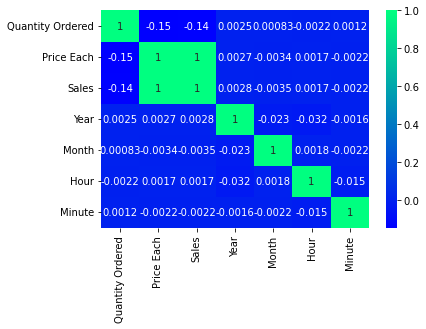

In [33]:
sns.heatmap(main_df.corr(), cmap='winter', annot=True );

## Price Each and Sales Attributes are highly correlated.

## Since, Sales is directly proportional to Price of Each Items.

## Determining Top 3 Months with Maximum and Minimum Sales in 2019.

# Sorting our main_df by Month.

In [36]:
main_df= main_df.sort_values('Month')

In [37]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Cities,Month_l
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,2019,1,12,11,San Francisco (CA),Jan
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,2019,1,18,53,Seattle (WA),Jan
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,2019,1,9,45,San Francisco (CA),Jan
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,2019,1,8,21,Austin (TX),Jan
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,2019,1,23,31,Los Angeles (CA),Jan


In [38]:
# Creating monthly_sales dataframe for Ploting...

monthly_sales = main_df.groupby('Month_l', sort=False).sum() # sort=False for not arrranging month in Alphabetical Order.
monthly_sales.reset_index(inplace=True)
monthly_sales['Month_l']

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: Month_l, dtype: object

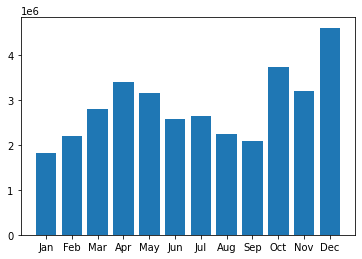

In [40]:
plt.bar(monthly_sales['Month_l'], monthly_sales['Sales']);

## In the month of December of year 2019, the maximum sales occurred, may be because of Holiday and Christmas in December and in the month of Jan, the minimum sales occurred.

In [41]:
monthly_sales.head()

,Month_l,Quantity Ordered,Price Each,Sales,Year,Month,Hour,Minute
0,Jan,10893,1810924.81,1821413.16,19582315,9699,139339,282230
1,Feb,13431,2186940.38,2200078.08,24141183,23914,172392,354307
2,Mar,16979,2789084.64,2804973.35,30543432,45384,218622,446783
3,Apr,20536,3366218.76,3389217.98,36860883,73028,261916,543611
4,May,18653,3133134.61,3150616.23,33418488,82760,238580,487579


## Displaying Top 3 Months with Maximum and Minimum Sales


In [49]:
top_3_months=monthly_sales[['Month_l','Sales']].sort_values(by='Sales', ascending=False)[:3].set_index('Month_l')
print(f"Top 3 Months with Maximum Sales\n\n{top_3_months}\n\n")
bottom_3_months = monthly_sales[['Month_l', 'Sales']].sort_values(by='Sales')[:3].set_index('Month_l')
print(f"Top 3 Months with Minimum Sales\n\n{bottom_3_months}")

Top 3 Months with Maximum Sales

              Sales
Month_l            
Dec      4608295.70
Oct      3734777.86
Apr      3389217.98


Top 3 Months with Minimum Sales

              Sales
Month_l            
Jan      1821413.16
Sep      2094465.69
Feb      2200078.08


## Top 3 Cities with Maximum and Minimum Sales in year 2019

In [51]:
city_with_sales_df = main_df.groupby('Cities')[['Quantity Ordered', 'Sales']].sum()
city_with_sales_df.head()

,Quantity Ordered,Sales
Cities,,
Atlanta (GA),16584,2794199.07
Austin (TX),11137,1818044.33
Boston (MA),22494,3658627.65
Dallas (TX),16707,2765373.96
Los Angeles (CA),33247,5448304.28


In [55]:
city_with_sales_df.reset_index(inplace=True)
city_with_sales_df.head()

,Cities,Quantity Ordered,Sales
0,Atlanta (GA),16584,2794199.07
1,Austin (TX),11137,1818044.33
2,Boston (MA),22494,3658627.65
3,Dallas (TX),16707,2765373.96
4,Los Angeles (CA),33247,5448304.28


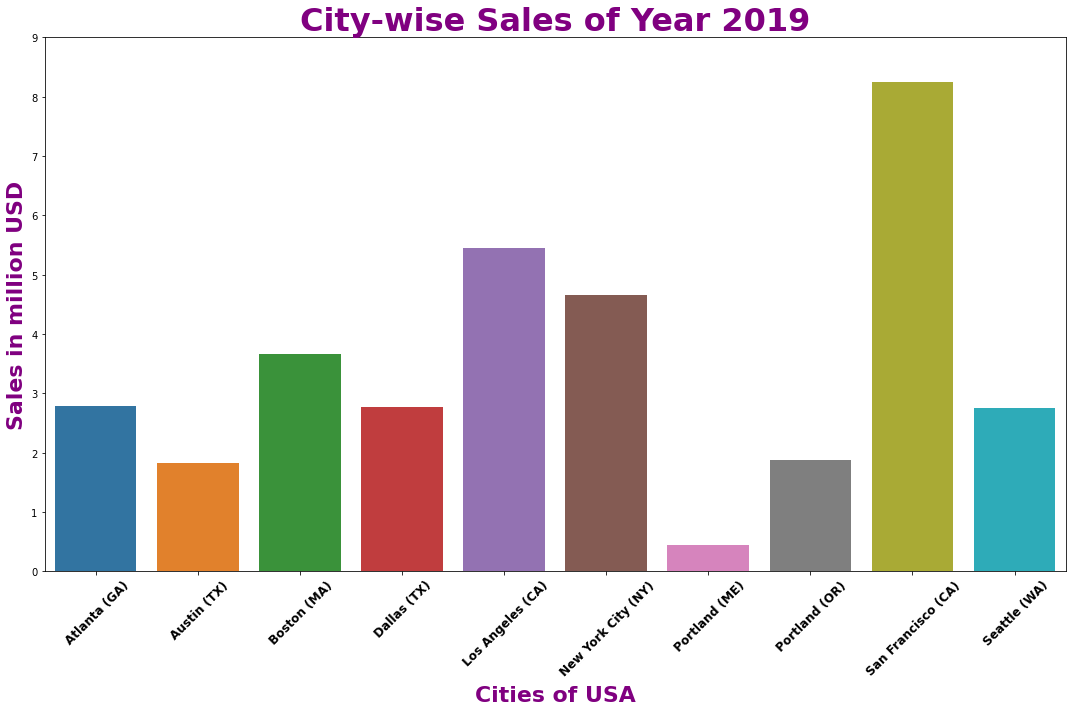

In [56]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax = sns.barplot(x=city_with_sales_df['Cities'],
                 y=city_with_sales_df['Sales'])
ax.set_xticklabels(labels=list(city_with_sales_df['Cities']) , rotation=45, fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Cities of USA', fontsize=22, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Sales in million USD', fontsize=22, fontweight='bold').set_color('purple')
plt.title(label='City-wise Sales of Year 2019', fontsize=32, fontweight='bold').set_color('purple')
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.tight_layout();

## Displaying Top/Bottom 3 Cities with their Total Sales.

In [58]:
top_3_cities = city_with_sales_df[['Cities', 'Sales']].sort_values(by='Sales', ascending=False)[:3].set_index('Cities')
print(f"Top 3 Cities with Maximum Sales\n\n{top_3_cities}\n\n")
bottom_3_cities = city_with_sales_df[['Cities', 'Sales']].sort_values(by='Sales')[:3].set_index('Cities')
print(f"Top 3 cities with Minimum Sales\n\n{bottom_3_cities}")

Top 3 Cities with Maximum Sales

                          Sales
Cities                         
 San Francisco (CA)  8254743.55
 Los Angeles (CA)    5448304.28
 New York City (NY)  4661867.14


Top 3 cities with Minimum Sales

                     Sales
Cities                    
 Portland (ME)   449321.38
 Austin (TX)    1818044.33
 Portland (OR)  1870010.56


## San Francisco(CA) was the best City of Sales in 2019 with Sales of   8,254,743.55

## (ME) was the wrost City of Sales in 2019 with Sales of $ 449,321.38

# Mining Best Time to Display Advertisements to Maximize the Sales

In [59]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Cities,Month_l
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,2019,1,12,11,San Francisco (CA),Jan
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,2019,1,18,53,Seattle (WA),Jan
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,2019,1,9,45,San Francisco (CA),Jan
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,2019,1,8,21,Austin (TX),Jan
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,2019,1,23,31,Los Angeles (CA),Jan


## Grouping Datasets by Hour & Prepare a Dataframe for Ploting.

In [60]:
order_hour_df = main_df.groupby('Hour')['Quantity Ordered'].count().reset_index(name='No. of Orders')
order_hour_df.head()

,Hour,No. of Orders
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852


## Ploting Line Plot between Total no. of Orders made in Different Hour of the Day.

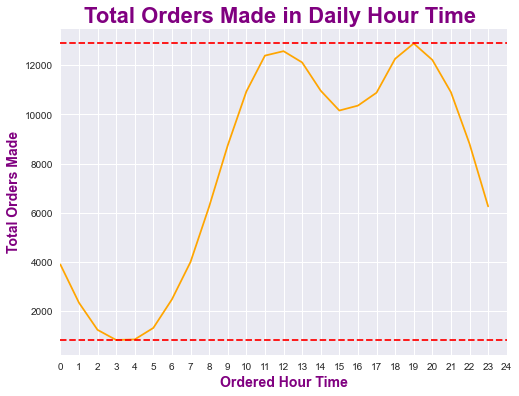

In [61]:
#Styling our plots and dimensions.

plt.style.use('seaborn')
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

# Ploting Line Plot.
plt.plot(order_hour_df['Hour'], order_hour_df['No. of Orders'], color='orange') #plt.plot(x,y)

# Adding labels and Styling to Labels

plt.xlabel(xlabel='Ordered Hour Time', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Total Orders Made', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Total Orders Made in Daily Hour Time ', fontsize=22, fontweight='bold').set_color('purple')

plt.xticks(range(0,25))
plt.xlim([0,24])

plt.axhline(order_hour_df['No. of Orders'].max(), linestyle='--', c='red')
plt.axhline(order_hour_df['No. of Orders'].min(), linestyle='--', c='red');


## As you can see from the Figure , there are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM).

## From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

## Analyzing Citywise Orders & Making Specific Chart
## It will be really better if we determine separately the Best Advertisement Time for Each City. Here, we plot with city with maximum sales i.e. San Francisco(CA) and minimum sales i.e. Portland(ME).

### Chart for San Francisco(CA) and Portland(ME

In [62]:
ads_city_hour_df = main_df.groupby(['Hour', 'Cities'])['Quantity Ordered'].count()
ads_city_hour_df.head()

Hour  Cities           
0      Atlanta (GA)        310
       Austin (TX)         198
       Boston (MA)         426
       Dallas (TX)         283
       Los Angeles (CA)    634
Name: Quantity Ordered, dtype: int64

In [63]:
ads_city_hour_df = ads_city_hour_df.unstack().fillna(0)
ads_city_hour_df.head()

Cities,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Hour,,,,,,,,,,
0,310,198,426,283,634,557,48,223,937,286
1,213,128,220,168,397,328,34,123,569,167
2,112,70,119,92,197,164,14,71,315,88
3,57,54,80,69,116,100,11,47,219,77
4,80,42,90,55,124,106,11,51,217,76


 Here, city name consists of total no. of Orders made with Daily Hour Time(Row-wise).

 Total Orders Made = 310 in Atlanta(GA) for Hour= 0(12AM)

## extracting column of CA and ME and creating DF for plotting

In [68]:
SanFranciscoCA_hour_df = pd.DataFrame(ads_city_hour_df[' San Francisco (CA)'])
SanFranciscoCA_hour_df.reset_index(inplace=True)
SanFranciscoCA_hour_df.head()

,Hour,San Francisco (CA)
0,0,937
1,1,569
2,2,315
3,3,219
4,4,217


In [67]:
ads_city_hour_df.columns


Index([' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)',
       ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)',
       ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)'],
      dtype='object', name='Cities')

In [4]:
PortlandME_hour_df = pd.DataFrame(ads_city_hour_df[' Portland (ME)'])
PortlandME_hour_df.reset_index(inplace=True)
PortlandME_hour_df.head()

NameError: name 'pd' is not defined

## plotting for san francisco

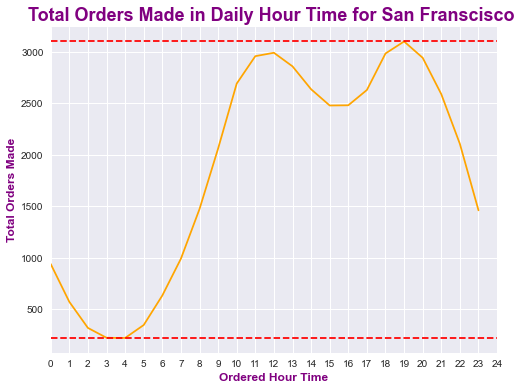

In [73]:
#Styling our plots and dimensions.

plt.style.use('seaborn')
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

# Ploting Line Plot.
plt.plot(SanFranciscoCA_hour_df['Hour'], SanFranciscoCA_hour_df[' San Francisco (CA)'], color='orange') #plt.plot(x,y)

# Adding labels and Styling to Labels

plt.xlabel(xlabel='Ordered Hour Time', fontsize=12, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Total Orders Made', fontsize=12, fontweight='bold').set_color('purple')
plt.title(label='Total Orders Made in Daily Hour Time for San Franscisco ', fontsize=18, fontweight='bold').set_color('purple')

plt.xticks(range(0,25))
plt.xlim([0,24])

plt.axhline(SanFranciscoCA_hour_df[' San Francisco (CA)'].max(), linestyle='--', c='red')
plt.axhline(SanFranciscoCA_hour_df[' San Francisco (CA)'].min(), linestyle='--', c='red');

For Sans Franscisco(CA) ,

Best Advertisement Time will be right before 12 A.M and/or 7 P.M.

It could be 11:30 A.M and/or 6:30 PM.

## Ploting for Portland(ME)

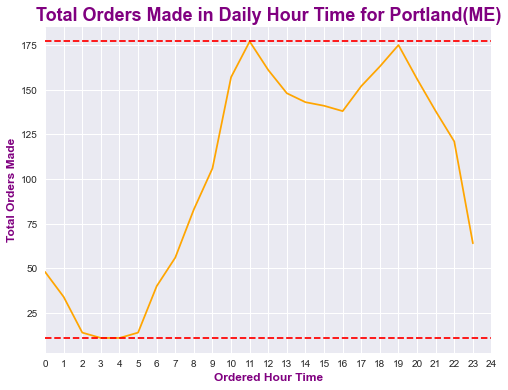

In [74]:
#Styling our plots and dimensions.

plt.style.use('seaborn')
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

# Ploting Line Plot.
plt.plot(PortlandME_hour_df['Hour'], PortlandME_hour_df[' Portland (ME)'], color='orange') #plt.plot(x,y)

# Adding labels and Styling to Labels

plt.xlabel(xlabel='Ordered Hour Time', fontsize=12, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Total Orders Made', fontsize=12, fontweight='bold').set_color('purple')
plt.title(label='Total Orders Made in Daily Hour Time for Portland(ME)', fontsize=18, fontweight='bold').set_color('purple')

plt.xticks(range(0,25))
plt.xlim([0,24])

plt.axhline(PortlandME_hour_df[' Portland (ME)'].max(), linestyle='--', c='red')
plt.axhline(PortlandME_hour_df[' Portland (ME)'].min(), linestyle='--', c='red');

For Portland(ME) ,

Best Advertisement Time will be right before 11 A.M and/or 7 P.M.

It could be 10:30 A.M and/or 6:30 PM.

## Top 5-Most Ordered /Sold Product

In [45]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Cities,Month_l
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,2019,1,12,11,San Francisco (CA),Jan
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,2019,1,18,53,Seattle (WA),Jan
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,2019,1,9,45,San Francisco (CA),Jan
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,2019,1,8,21,Austin (TX),Jan
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,2019,1,23,31,Los Angeles (CA),Jan


In [46]:
product_df = main_df.groupby('Product').sum()
product_df = product_df.reset_index()
product_df.head()

,Product,Quantity Ordered,Price Each,Sales,Year,Month,Hour,Minute
0,20in Monitor,4126,450739.02,453818.74,8273864,29319,58729,122096
1,27in 4K Gaming Monitor,6239,2427687.75,2433147.61,12568276,44396,90841,184129
2,27in FHD Monitor,7541,1124625.02,1131074.59,15138465,52484,107422,219659
3,34in Ultrawide Monitor,6192,2346058.26,2352898.08,12465306,43258,88957,183318
4,AA Batteries (4-pack),27615,78942.72,106041.60,41506602,145423,298077,608560


## Ploting the Bar Graph.

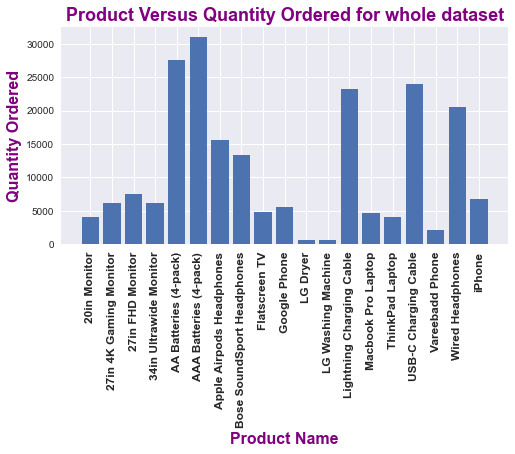

In [47]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(8)

plt.bar(product_df['Product'], product_df['Quantity Ordered'])
plt.xticks(ticks = list( product_df['Product']), rotation='vertical', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Product Name', fontsize=16, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Quantity Ordered', fontsize=16, fontweight='bold').set_color('purple')
plt.title(label='Product Versus Quantity Ordered for whole dataset', fontsize=18, fontweight='bold').set_color('purple');

Most Ordered/Sold Product Name in 2019: AAA Batteries(4-Pack)

## Displaying Top 5 Most Ordered Product.

In [49]:
top_5_product_df = product_df.sort_values(by='Quantity Ordered', ascending=False)[['Product', 'Quantity Ordered']][:5]
print(f"Top 5 Most Ordered/Sold Products\n\n{top_5_product_df.set_index('Product')}")

Top 5 Most Ordered/Sold Products

                          Quantity Ordered
Product                                   
AAA Batteries (4-pack)               30986
AA Batteries (4-pack)                27615
USB-C Charging Cable                 23931
Lightning Charging Cable             23169
Wired Headphones                     20524
